In [1]:
!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-tsz_0ujr
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-tsz_0ujr
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0174c9a5c1cc51a3af1de98d84824c811ecd49029_-cp36-none-any.whl size=145036 sha256=f675f11e00c935228373ef0ae993d8185844fe5f1f2743960d5253d4e431560e
  Stored in directory: /tmp/pip-ephem-wheel-cache-66k2w60s/wheels/eb/1b/35/fce87697be00d2fc63e0b4b395b0d9c7e391a10e98d9a0d97f
Successfully built tensorflow-docs


In [2]:
from IPython.display import display,HTML
c1,c2,f1,f2,fs1,fs2=\
'#ff1177','#7711ff','Wallpoet','Orbitron',20,10
def dhtml(string,fontcolor=c1,font=f1,fontsize=fs1):
    display(HTML("""<style>
    @import 'https://fonts.googleapis.com/css?family="""\
    +font+"""&effect=3d-float';</style>
    <h1 class='font-effect-3d-float' 
    style='font-family:"""+font+\
    """; color:"""+fontcolor+\
    """; font-size:"""+str(fontsize)+"""px;'>
    %s</h1>"""%string))

In [3]:
dhtml('Code Modules, Setting, & Functions')

In [4]:
import warnings,urllib,imageio
import pylab as pl,tensorflow as tf
import pandas as pd,numpy as np
from mpl_toolkits.mplot3d import Axes3D
from tensorflow_docs.vis import embed
from tensorflow.keras.preprocessing import image as tkimg
from PIL import Image,ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES=True 

In [5]:
dhtml('Data')

In [6]:
path='https://olgabelitskaya.github.io/'
for zf in ['beethoven.csv',
           'castle.csv','horse.csv',
           'SpaceShuttle.csv',
           'SpaceShuttle2.csv',
           'TruncatedOctahedron.csv',
           'TruncatedOctahedron2.csv',
           'TruncatedIcosahedron.csv',
           'TruncatedIcosahedron2.csv']:
    input_file=urllib.request.urlopen(path+zf)
    output_file=open(zf,'wb'); 
    output_file.write(input_file.read())
    output_file.close(); input_file.close()

In [7]:
dhtml('Interpolation')

In [8]:
fp1='beethoven.csv'
fp2='castle.csv'
b=pd.read_csv(fp1)
c=pd.read_csv(fp2)
display(b.head(3).style\
.background_gradient(cmap='Spectral',axis=0))
(c.head(3)/50).style\
.background_gradient(cmap='Spectral',axis=0)

,x,y,z
0,1.417940,-1.493780,-2.541190
1,1.259330,-1.563340,-2.426000
2,1.236120,-1.686120,-2.711170


,x,y,z
0,-1.226538,0.577444,4.933820
1,-1.226476,0.577444,4.941020
2,-1.226960,0.577444,4.934460


In [9]:
n=min(b.shape[0],c.shape[0]); n
b,c=b.loc[:n-1].values,c.loc[:n-1].values
b.shape[0],c.shape[0]

(3189, 3189)

In [10]:
def interpolate_hypersphere(v1,v2,steps):
    v1norm=tf.norm(v1)
    v2norm=tf.norm(v2)
    v2normalized=v2*(v1norm/v2norm)
    vectors=[]
    for step in range(steps):
        interpolated=v1+(v2normalized-v1)*step/(steps-1)
        interpolated_norm=tf.norm(interpolated)
        interpolated_normalized=\
        interpolated*(v1norm/interpolated_norm)
        vectors.append(interpolated_normalized)
    return tf.stack(vectors).numpy()

In [11]:
steps=12
a=interpolate_hypersphere(b,c,steps)
a.shape

(12, 3189, 3)

In [12]:
dhtml('Plotting')

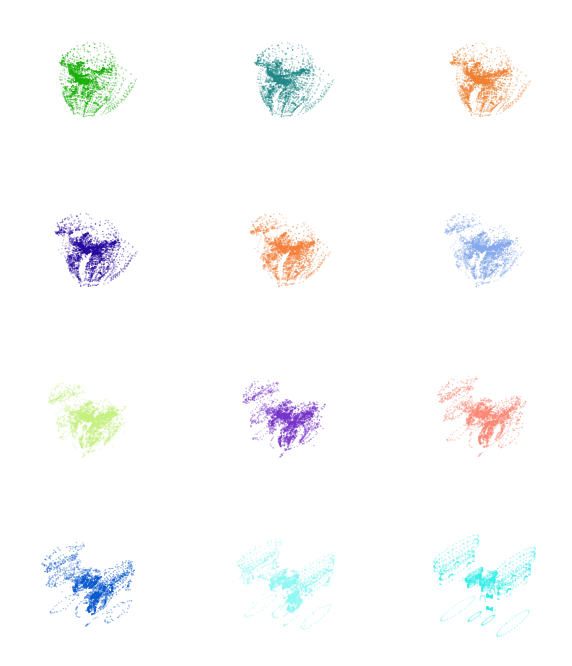

In [13]:
f=pl.figure(figsize=(10,12))
for i in range(steps):
    ax=f.add_subplot(4,steps//4,i+1,projection='3d')
    ax.scatter3D(a[i][:,0],a[i][:,1],a[i][:,2],
                 color=np.random.random(3),s=.1)
    ax.set_axis_off();

In [14]:
dhtml('Trajectory Checking')

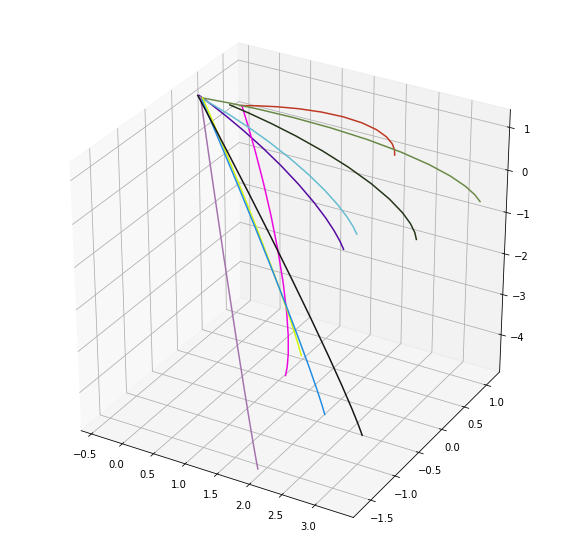

In [15]:
f=pl.figure(figsize=(10,10))
ax=f.add_subplot(111,projection='3d')
for i in range(100,200,10):
    x=np.squeeze(a[:,i:i+1,0])
    y=np.squeeze(a[:,i:i+1,1])
    z=np.squeeze(a[:,i:i+1,2])
    ax.plot(x,y,z,color=np.random.random(3));

In [16]:
dhtml('3D Sculptures')

In [17]:
fp3='horse.csv'
h=pd.read_csv(fp3)
hv=h.values*10
display(h.head(3).style\
.background_gradient(cmap='Spectral',axis=0))

,x,y,z
0,-0.034812,-0.004995,-0.075750
1,-0.035076,-0.004670,-0.076418
2,-0.035388,-0.006674,-0.074962


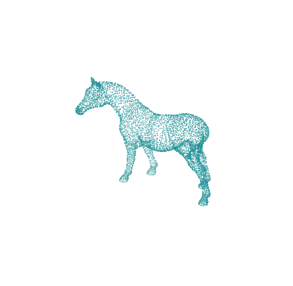

In [18]:
f=pl.figure(figsize=(5,5))
ax=f.add_subplot(111,projection='3d')
ax.scatter3D(hv[:,0],hv[:,1],hv[:,2],
             color=np.random.random(3),s=.1)
ax.set_xlim([-1,1]); ax.set_ylim([-1,1])
ax.set_zlim([-1,1]); ax.set_axis_off()

In [19]:
dhtml('Polyhedrons')
#{Cuboctahedron,GreatRhombicosidodecahedron,GreatRhombicuboctahedron,Icosidodecahedron,
#SmallRhombicosidodecahedron,SmallRhombicuboctahedron,SnubCube,SnubDodecahedron,TruncatedCube,
#TruncatedDodecahedron,TruncatedIcosahedron,TruncatedOctahedron,TruncatedTetrahedron}

,x,y,z
0,-0.162460,-2.118030,1.275980
1,-0.162460,2.118030,1.275980
2,0.162460,-2.118030,-1.275980


,v1,v2
0,1,10
1,1,41
2,1,59


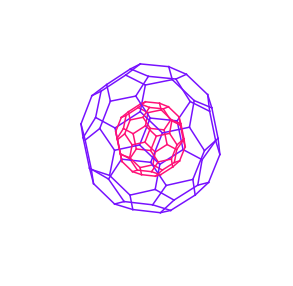

In [20]:
dfv=pd.read_csv('TruncatedIcosahedron.csv')
dfe=pd.read_csv('TruncatedIcosahedron2.csv')
display(dfv.head(3).style\
.background_gradient(cmap='Spectral',axis=0))
display(dfe.head(3).style\
.background_gradient(cmap='Spectral',axis=0))
f=pl.figure(figsize=(5,5))
ax=f.add_subplot(111,projection='3d')
v=dfv.values; e=dfe.values
for i in range(e.shape[0]):
    ax.plot(v[e[i]-1,0],v[e[i]-1,1],v[e[i]-1,2],
            color=c1);
    ax.plot(2*v[e[i]-1,0],2*v[e[i]-1,1],2*v[e[i]-1,2],
            color=c2)
ax.set_axis_off(); pl.show()

In [21]:
dhtml('Animation')

In [22]:
dfv2=pd.read_csv(path+'SpaceShuttle.csv')
dfe2=pd.read_csv(path+'SpaceShuttle2.csv')
dfe2['v5']=0
display(dfv2.tail(3).style\
.background_gradient(cmap='Spectral',axis=0))
display(dfe2.tail(3).style\
.background_gradient(cmap='Spectral',axis=0))
v2=dfv2.values; e2=dfe2.values
e2[:,4][e2[:,3]!=0]=e2[:,0][e2[:,3]!=0]
e2[:,3][e2[:,3]==0]=e2[:,0][e2[:,3]==0]
for j in range(2):
    f=pl.figure(figsize=(10,10))
    ax=f.add_subplot(111,projection='3d')
    for i in range(e2.shape[0]):
        ed=[el-1 for el in e2[i] if el!=0]
        ax.plot((j+1)*v2[ed,0],
                (j+1)*v2[ed,1],
                (j+1)*v2[ed,2],
                color=c1,lw=1)
    ax.set_xlim([-10,10]); ax.set_ylim([-5,5])
    ax.set_zlim([-10,10]); ax.set_axis_off()
    pl.savefig('vf%s'%(j+1)); pl.close()

,x,y,z
307,5.165640,0.318491,0.637345
308,5.295470,-0.722016,-0.722016
309,5.257180,0.244260,-0.448877


,v1,v2,v3,v4,v5
390,219,210,226,225,0
391,188,187,269,268,0
392,288,287,215,212,0


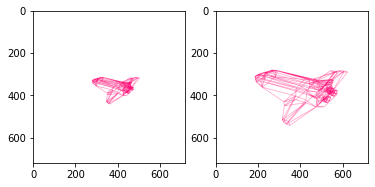

(60, 720, 720, 3)

In [23]:
def show_interpolate(f1,f2,steps):
    img1=tf.image.decode_image(tf.io.read_file(f1))
    img1=img1.numpy()[:,:,:3]/255.
    pl.subplot(1,2,1); pl.imshow(img1)
    img2=tf.image.decode_image(tf.io.read_file(f2))
    img2=img2.numpy()[:,:,:3]/255.
    pl.subplot(1,2,2); pl.imshow(img2)
    pl.show()
    if1=interpolate_hypersphere(img1,img2,steps)
    if2=interpolate_hypersphere(img2,img1,steps)
    return np.vstack([if1,if2])
images=show_interpolate('vf1.png','vf2.png',30)
images.shape

In [ ]:
def animate(images):
    converted_images=np.clip(images*255,0,255)\
    .astype(np.uint8)
    imageio.mimsave('animation.gif',converted_images)
    return embed.embed_file('animation.gif')
animate(images)